In [1]:
import pandas as pd
import numpy as np
from os import listdir

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import CenteredNorm
%matplotlib inline

In [3]:
from sklearn import metrics
from scipy import stats

In [4]:
def merge_results_frames(df,df2):
    for idx,r in df.iterrows():
        g = r['gamma']
        p = r['bias']
        for col in df.columns:
            if col == 'gamma' or col == 'bias':
                continue
            df.loc[(df['gamma']==g) & (df['bias']==p),col]+=df2.loc[(df2['gamma']==g) & (df2['bias']==p),col]

def str2list(strarray):
    return [float(x) for x in strarray.strip('[] ').split()]

def df_str2list(df):
    for col in df.columns:
        if col == 'gamma' or col == 'bias':
            continue
        df[col] = df[col].apply(str2list)

In [5]:
results_dir='Results/'

resdict = {}
first = True
for filename in listdir(results_dir):
    if first:
        df = pd.read_csv(results_dir+filename)
        df_str2list(df)
        first = False
    else:
        df2 = pd.read_csv(results_dir+filename)
        df_str2list(df2)
        merge_results_frames(df,df2)

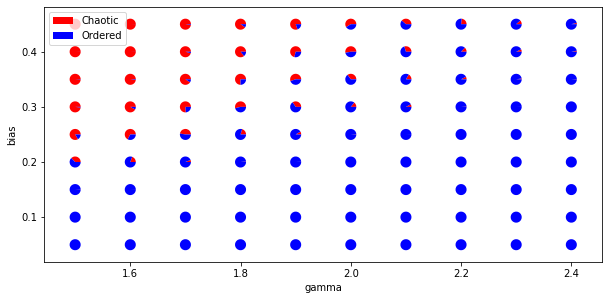

In [6]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
varx = 'gamma'
vary = 'bias'
for _,row in df.iterrows():
    x = np.mean(row[varx])
    y = np.mean(row[vary])
    ones = np.mean([derrida > 1 for derrida in row['Derrida']])
    ax.pie([ones, 1-ones], center=(x, y), radius=0.01, colors=['r', 'b'], frame=True)
    ones = [derrida > 1 for derrida in row['Derrida']]
    

legend_elements = [Patch(facecolor='r', label='Chaotic'), Patch(facecolor='b', label='Ordered')]
plt.xlabel(varx)
plt.ylabel(vary)
ax.legend(handles=legend_elements, loc='best')

In [7]:
dictall = {}
for _,row in df.iterrows():
    for col in df.columns:
        if col in ['gamma','bias']:
            rowlist = [row[col]]*len(row['Derrida'])
        else:
            rowlist = row[col]
        if col in dictall:
            dictall[col] += rowlist
        else:
           dictall[col] = rowlist.copy()
           
dfall = pd.DataFrame(dictall)

dfall['entropy'] = -(dfall['bias']*np.log2(dfall['bias']))-((1-dfall['bias'])*np.log2(1-dfall['bias']))
dfall['entropy'] = -(dfall['bias']*np.log(dfall['bias']))-((1-dfall['bias'])*np.log(1-dfall['bias']))
dfall['variance'] = dfall['bias']*(1-dfall['bias'])

dfall['avgS']=dfall['avgKe']-dfall['avgKc']
dfall['avgSe']=3.33*dfall['avgKe']*dfall['variance']
dfall['avgSk']=2*dfall['avgK']*dfall['variance']
dfall['regime']=(dfall['Derrida']>1).astype(int) - (dfall['Derrida']<1).astype(int)
dfall['bve']=dfall['avgSe']/(2*dfall['avgK'])
dfall['avgSe_sample']=3.33*dfall['avgKe']*dfall['bve']
dfall['avgKe_ent']=dfall['avgKe']*dfall['entropy']
dfall=dfall.sample(frac = 1)
dfall

,gamma,bias,Derrida,avgK,medK,avgKe,medKe,avgKc,medKc,entropy,variance,avgS,avgSe,avgSk,regime,bve,avgSe_sample,avgKe_ent
13116,1.8,0.35,0.963,2.15,1.0,1.293726,1.0,0.317303,0.0,0.647447,0.2275,0.976423,0.980095,0.97825,-1,0.227929,0.981943,0.837619
19111,2.0,0.25,0.760,2.06,1.0,1.041117,1.0,0.273348,0.0,0.562335,0.1875,0.767769,0.650047,0.77250,-1,0.157778,0.547005,0.585457
5175,1.6,0.25,0.936,2.54,1.0,1.456237,1.0,0.495133,0.0,0.562335,0.1875,0.961104,0.909238,0.95250,-1,0.178984,0.867941,0.818893
5627,1.6,0.30,0.854,2.44,1.0,1.227370,1.0,0.356111,0.0,0.610864,0.2100,0.871260,0.858300,1.02480,-1,0.175881,0.718852,0.749757
5373,1.6,0.25,1.040,2.73,1.5,1.546596,1.0,0.522614,0.0,0.562335,0.1875,1.023982,0.965656,1.02375,1,0.176860,0.910858,0.869705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27089,2.2,0.35,0.838,1.84,1.0,1.041017,1.0,0.211633,0.0,0.647447,0.2275,0.829385,0.788649,0.83720,-1,0.214307,0.742913,0.674003
8663,1.7,0.25,1.119,2.93,1.0,1.780958,1.0,0.654886,0.0,0.562335,0.1875,1.126072,1.111986,1.09875,1,0.189759,1.125380,1.001495
10189,1.7,0.45,1.513,2.88,2.0,2.050219,1.0,0.530579,0.0,0.688139,0.2475,1.519640,1.689739,1.42560,1,0.293358,2.002819,1.410835
31280,2.3,0.45,0.850,1.63,1.0,0.985114,1.0,0.139333,0.0,0.688139,0.2475,0.845781,0.811907,0.80685,-1,0.249051,0.816995,0.677896


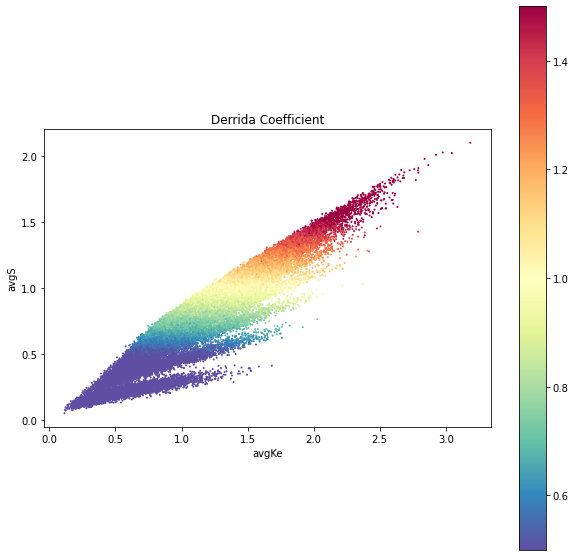

In [8]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'avgKe'
vary = 'avgS'
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel(varx)
plt.ylabel(vary)
plt.title('Derrida Coefficient')
plt.show()

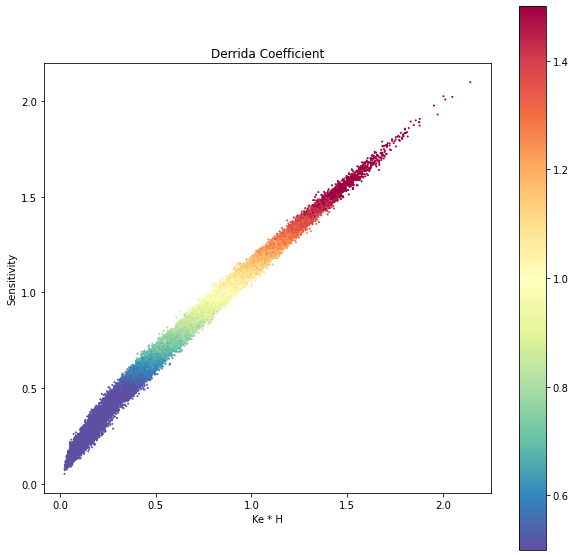

In [9]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall['avgKe_ent'],dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_xlim((0,5))
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("Ke * H")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

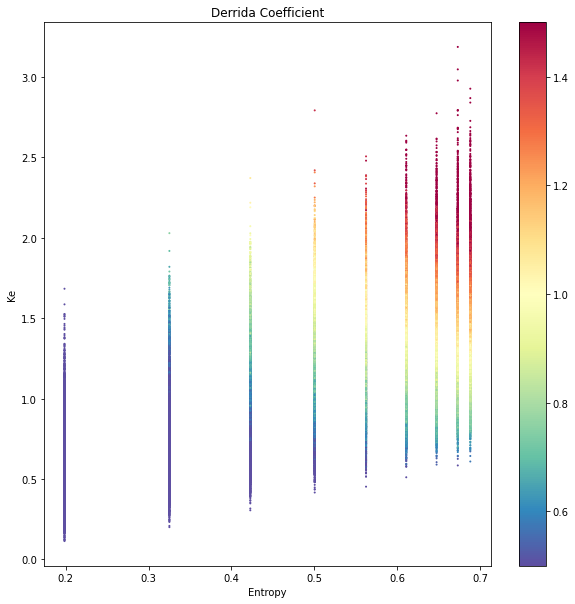

In [10]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall['entropy'],dfall['avgKe'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("Entropy")
plt.ylabel("Ke")
plt.title('Derrida Coefficient')
plt.show()

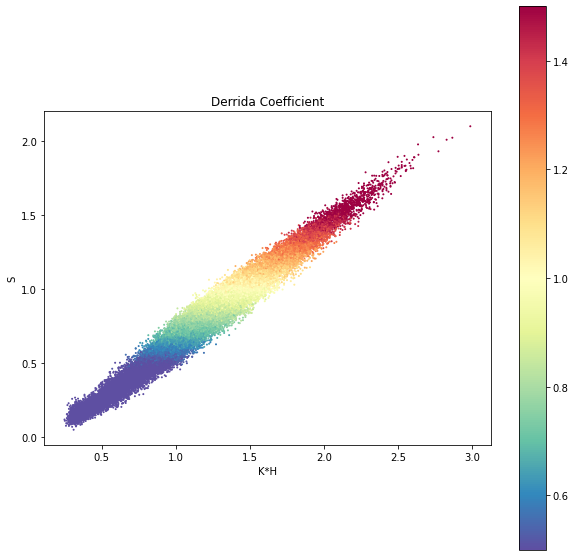

In [11]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall['avgK']*(dfall['avgKe_ent']/dfall['avgKe']), dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
#ax.set_xlim((0,5))
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("K*H")
plt.ylabel("S")
plt.title('Derrida Coefficient')
plt.show()

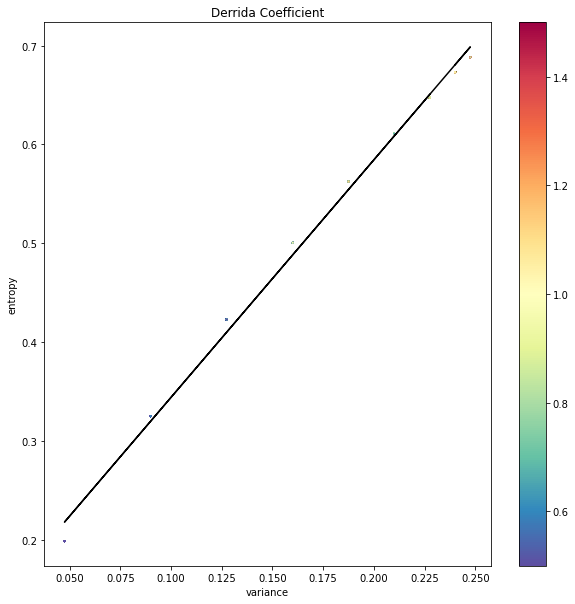

In [12]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall['variance'],dfall['entropy'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)

linear_model=np.polyfit(dfall['variance'],dfall['entropy'],1)
linear_model_fn=np.poly1d(linear_model)
plt.plot(dfall['variance'],linear_model_fn(dfall['variance']),color="black")

#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("variance")
plt.ylabel("entropy")
plt.title('Derrida Coefficient')
plt.show()

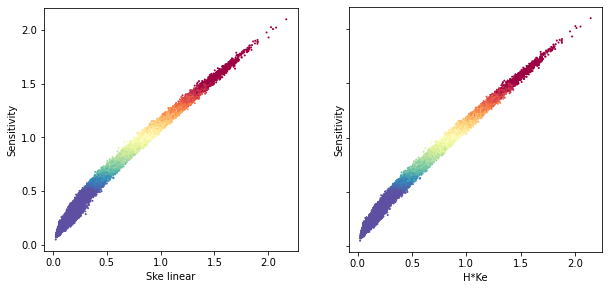

In [13]:
fig, ax = plt.subplots(1,2,sharey='row',figsize=(10, 10),facecolor='white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax[0].scatter(dfall['avgKe']*linear_model_fn(dfall['variance']),dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax[0].set_aspect('equal', 'box')
ax[0].set_xlabel("Ske linear")
ax[0].set_ylabel("Sensitivity")

sc=ax[1].scatter(dfall['avgKe_ent'],dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax[1].set_aspect('equal', 'box')
ax[1].set_xlabel("H*Ke")
ax[1].set_ylabel("Sensitivity")
#plt.title('Derrida Coefficient')
plt.show()

In [14]:
dfall_trim = dfall.sample(frac=1.0)


m,b,r,p,s=stats.linregress(dfall_trim['variance'],dfall_trim['entropy'])
print('V-H:  ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgS'],dfall_trim['Derrida'])
print('S-d:  ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgKe_ent'],dfall_trim['Derrida'])
print('HKe-d:',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

mVH,bVH,_,_,_=stats.linregress(dfall_trim['variance'],dfall_trim['entropy'])
m,b,r,p,s=stats.linregress(dfall_trim['avgKe']*(mVH*dfall_trim['variance']+bVH),dfall_trim['Derrida'])
print('LKe-d:',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgK']*dfall_trim['entropy'],dfall_trim['Derrida'])
print('HK-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgK']*(mVH*dfall_trim['variance']+bVH),dfall_trim['Derrida'])
print('LK-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgSe'],dfall_trim['Derrida'])
print('Se-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(dfall_trim['avgSk'],dfall_trim['Derrida'])
print('Sk-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')

m,b,r,p,s=stats.linregress(((dfall_trim['avgK']+dfall_trim['avgKe'])/2)*dfall_trim['entropy'],dfall_trim['Derrida'])
print('Sk-d: ',f'{r**2 = },\t{m = },\t{b = },\t{p = },\t{s = }')


V-H:   r**2 = 0.995850808901556,	m = 2.4044182468962623,	b = 0.10352369332329736,	p = 0.0,	s = 0.0008284254051154148
S-d:   r**2 = 0.9940370519898909,	m = 1.0000997621303518,	b = 0.0001134165099173634,	p = 0.0,	s = 0.0004134579664060148
HKe-d: r**2 = 0.9835650238565501,	m = 0.9751590574015216,	b = 0.15379442023025003,	p = 0.0,	s = 0.0006728484786695468
LKe-d: r**2 = 0.9803796119525573,	m = 0.9662182654223368,	b = 0.15962580564919648,	p = 0.0,	s = 0.0007296099013368222
HK-d:  r**2 = 0.964639650051322,	m = 0.7737946247037165,	b = -0.12622810816937224,	p = 0.0,	s = 0.0007907883204970913
LK-d:  r**2 = 0.9671780792370823,	m = 0.7759010893953832,	b = -0.1286722359023753,	p = 0.0,	s = 0.0007629462640746459
Se-d:  r**2 = 0.9780022711371473,	m = 0.7921252161348141,	b = 0.20649327740766266,	p = 0.0,	s = 0.0006341202826594473
Sk-d:  r**2 = 0.9773025154268709,	m = 0.9998019153688112,	b = 0.0003106586759286101,	p = 0.0,	s = 0.0008132931905524617
Sk-d:  r**2 = 0.97799199337539,	m = 0.867300456537386

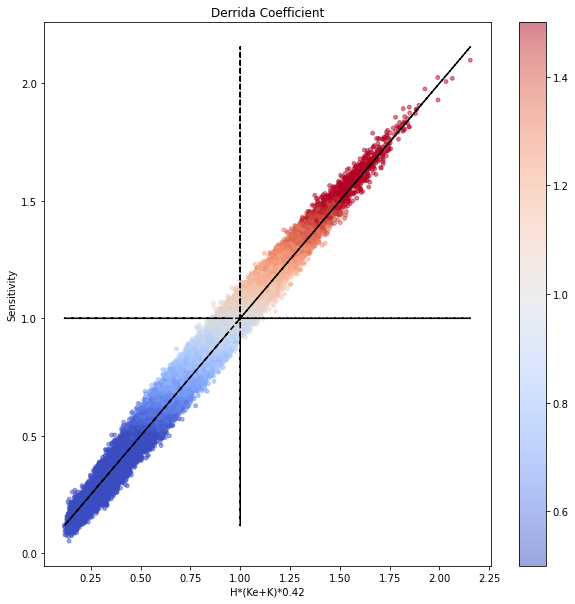

In [15]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('coolwarm')
x=.42*(dfall['avgKe']+dfall['avgK'])*dfall['entropy']
sc=ax.scatter(x,dfall['avgS'],s=15,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=0.5)
ax.plot(x,x,'k--')
ax.plot(x,x/x,'k--')
ax.plot(x/x,x,'k--')
#ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("H*(Ke+K)*0.42")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

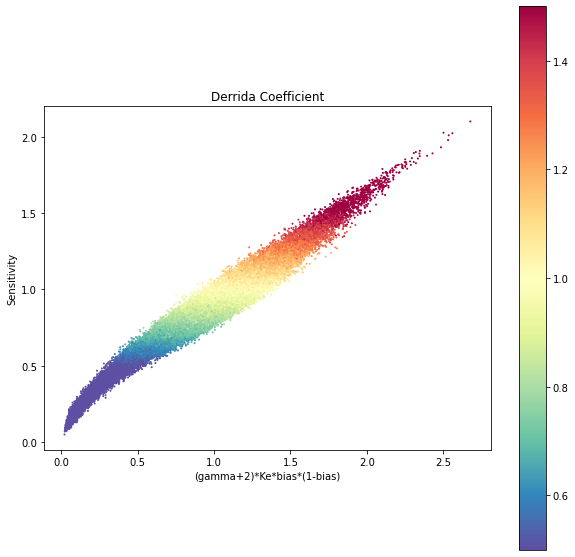

In [16]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter((dfall['gamma']+2)*dfall['avgKe']*dfall['bias']*(1-dfall['bias']),dfall['avgS'],s=1,c=dfall['Derrida'],cmap=cmap,norm=CenteredNorm(vcenter=1,halfrange=0.5),alpha=1.0)
ax.set_aspect('equal', 'box')
plt.colorbar(sc)
plt.xlabel("(gamma+2)*Ke*bias*(1-bias)")
plt.ylabel("Sensitivity")
plt.title('Derrida Coefficient')
plt.show()

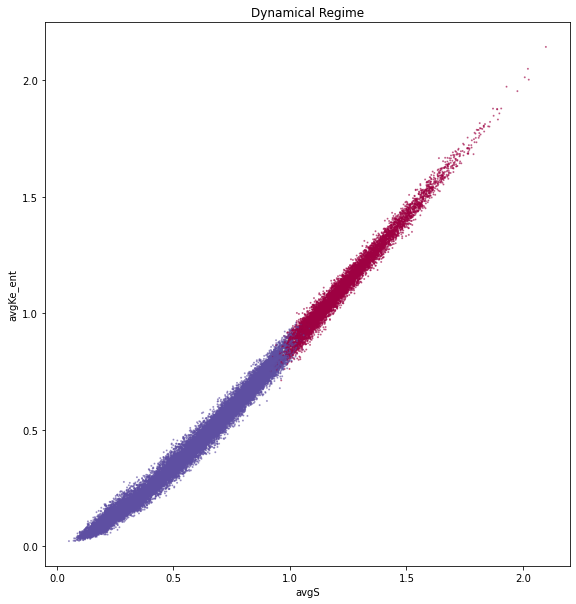

In [17]:
fig, ax = plt.subplots(figsize=(10, 10),facecolor='white')
ax.set_facecolor('white')
varx = 'avgS'
vary = 'avgKe_ent'
cmap = plt.cm.get_cmap('Spectral').reversed()
sc=ax.scatter(dfall[varx],dfall[vary],s=1,c=dfall['regime'],cmap=cmap,norm=CenteredNorm(vcenter=0,halfrange=1.0),alpha=0.5)
ax.set_aspect('equal', 'box')
plt.xlabel(varx)
plt.ylabel(vary)
plt.title("Dynamical Regime")
plt.show()

In [18]:
max([(np.mean(dfall['regime']==((dfall['avgSk']*scale>1).astype(int)-(dfall['avgSk']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9606837606837607, 1.0014999999999448)

In [19]:
max([(np.mean(dfall['regime']==((dfall['avgSe_sample']*scale>1).astype(int)-(dfall['avgSe_sample']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9618518518518518, 0.9929999999999457)

In [20]:
max([(np.mean(dfall['regime']==((dfall['avgSe']*scale>1).astype(int)-(dfall['avgSe']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9676923076923077, 0.9979999999999452)

In [21]:
max([(np.mean(dfall['regime']==((dfall['avgS']*scale>1).astype(int)-(dfall['avgS']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)])

(0.9785754985754985, 1.0019999999999447)

In [22]:
print(max([(np.mean(dfall['regime']==((dfall['avgKe_ent']*scale>1).astype(int)-(dfall['avgKe_ent']*scale<1).astype(int))),scale) for scale in np.arange(0.5,1.5,0.0005)]))
print(max([(np.mean(dfall['regime']==((dfall['avgKe_ent']*scale>1).astype(int)-(dfall['avgKe_ent']*scale<1).astype(int))),scale) for scale in [1]]))

(0.9726210826210826, 1.1704999999999262)
(0.9037321937321937, 1)


In [23]:
regime_truth = dfall['regime']
regime_S = ((dfall['avgS']>1).astype(int)-(dfall['avgS']<1).astype(int))
regime_Se = ((dfall['avgSe']>1).astype(int)-(dfall['avgSe']<1).astype(int))
regime_Sk = ((dfall['avgSk']>1).astype(int)-(dfall['avgSk']<1).astype(int))
regime_Ke_ent = ((dfall['avgKe_ent']*0.811>1).astype(int)-(dfall['avgKe_ent']*0.811<1).astype(int))

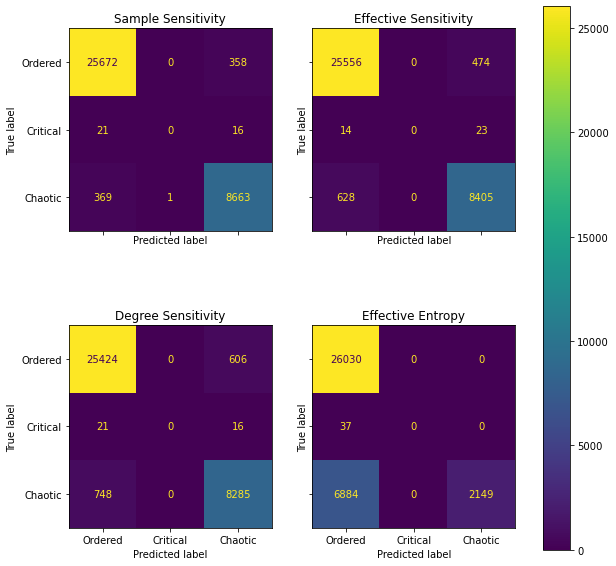

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey='row', sharex='col', facecolor='white')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_S)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0,0])
cm_display.im_.colorbar.remove()
ax[0,0].set_title('Sample Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Se)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0,1])
cm_display.im_.colorbar.remove()
ax[0,1].set_title('Effective Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Sk)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1,0])
cm_display.im_.colorbar.remove()
ax[1,0].set_title('Degree Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_Ke_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1,1])
cm_display.im_.colorbar.remove()
ax[1,1].set_title('Effective Entropy')

fig.colorbar(cm_display.im_, ax=ax)
plt.show()

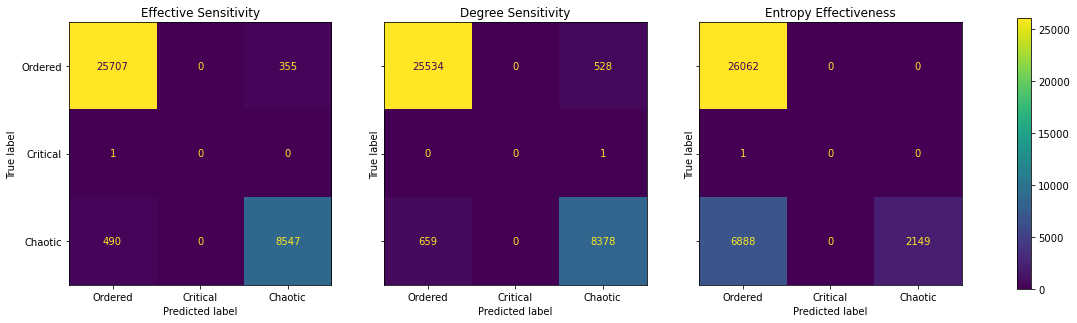

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey='row', facecolor='white')


confusion_matrix = metrics.confusion_matrix(regime_S, regime_Se)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0])
cm_display.im_.colorbar.remove()
ax[0].set_title('Effective Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_S, regime_Sk)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1])
cm_display.im_.colorbar.remove()
ax[1].set_title('Degree Sensitivity')


confusion_matrix = metrics.confusion_matrix(regime_S, regime_Ke_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[2])
cm_display.im_.colorbar.remove()
ax[2].set_title('Entropy Effectiveness')

fig.colorbar(cm_display.im_, ax=ax)
plt.show()

Text(0.5, 1.0, 'Entropy Effective Degree')

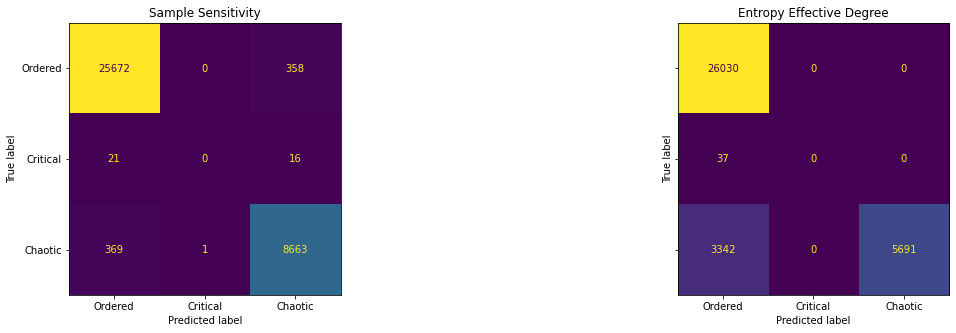

In [26]:
p = dfall['bias']
q = 1-dfall['bias']
pfunc = -(p*np.log(p))-(q*np.log(q))
pfunc*dfall['avgKe']
regime_ent = ((pfunc*dfall['avgKe']>1).astype(int)-(pfunc*dfall['avgKe']<1).astype(int))

fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharey='row', facecolor='white')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_S)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[0])
cm_display.im_.colorbar.remove()
ax[0].set_title('Sample Sensitivity')

confusion_matrix = metrics.confusion_matrix(regime_truth, regime_ent)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Ordered', 'Critical', 'Chaotic'])
cm_display.plot(ax=ax[1])
cm_display.im_.colorbar.remove()
ax[1].set_title('Entropy Effective Degree')